In [193]:
import os, re
import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1. 데이터 로드

In [194]:
table = pd.read_csv('C:/Users/plomo/Downloads/2021nlptest/NLP/dataset2.csv')

In [195]:
table = table[:4600]

In [196]:
train_data = table[:4000]
test_data = table[4001:4600]

In [197]:
print('훈련용 리뷰 개수:', len(train_data)) 

훈련용 리뷰 개수: 4000


In [198]:
train_data

,index,txt
0,0,엘리시움 배리 개쩜;;
1,0,◑업ㄷㅔㅇㅣ트㈍rㄹr고 ㄱㅔ임에서뜨는데 없뎃할ㄹㅏ고해도◑업뎃ㅇㅏ 안ㄸㅓ요
2,1,요샌 네이버 평점도 믿을게 못되는군. 행동거지가 예측이될정도니 한심하고. 온갖 바보...
3,0,갑자기 0x10030008 이라고뜨고 원격호스트종료 나오며 로그인이되질 않습니다. ...
4,1,공포 코미디 영화 보다가 웃기는 처음이다 이 새벽에
...,...,...
3995,1,엔딩 크레딧의 소리는 무엇일까..
3996,0,ios만 24시간 점검하고 보상 및 사과 공지도 제대로 안하는 유사게임ㅋㅋㅋㅋ 공지...
3997,0,:좋ㅇㅏ요좋㈇├욕좋아요좋아욮좋ㅇㅏ요:
3998,0,ㅠㅠ 제가 열심히60레밸까지 키워놨는데 ㅠㅠ 사라져 버렸어요 ㅠㅠ 어떻게야 되죠??...


In [199]:
 test_data

,index,txt
4001,0,관리자닝 제가 원래 키우던 아이디가 있었는데 이번에 다시 게임을 새로 깔아서 들어와...
4002,0,테이블 정보에서 접속이 안돼요..ㅠ(계속튕김
4003,1,"정작 정곡은 찌르지못하고,주변에서만 뱅뱅 도는듯한 느낌?자체검열이 심한 나라답다."
4004,0,재밌어영.컴터가 없어서 메플 못하는데 이렇게라도 해보네요ㅠ허스키랑 멍멍이펫 잘받았어...
4005,1,상큼하고 신선하다. 원제도 문제지만 번역제목이 너무 이상한게 아쉬울뿐
...,...,...
4595,0,접속하려고 할때마다 튕기는데 어쩌라는거지...
4596,0,그래도 다른건 정말 다 괜찮아요:) PC버전을 모바일로 옮기느라 정말 수고하셨을것같...
4597,0,분명히 잔액이 충분히 있음에도 불구하고 잔액이 부족하다고 뜹니다.해결 방법을 알려주세요
4598,1,아름다운 음악! 아름다운 영상! 최고!


In [200]:
train_data['txt'].nunique()

3979

In [201]:
train_data.drop_duplicates(subset=['txt'], inplace=True)

<ipython-input-201-b5208d1a6c67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop_duplicates(subset=['txt'], inplace=True)


In [202]:
len(train_data)

3979

<AxesSubplot:>

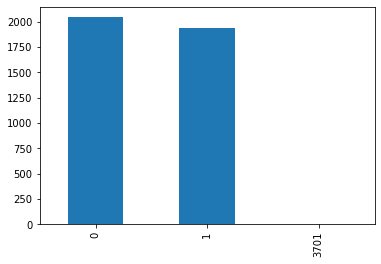

In [203]:
train_data['index'].value_counts().plot(kind='bar')

In [204]:
print(train_data.isnull().values.any())

False


# 2. 데이터 정제

In [205]:
train_data['txt'] = train_data['txt'].str.replace('[^ㄱ-하-ㅣ가-힣]',"")
train_data[:5]

<ipython-input-205-503ba5d240ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['txt'] = train_data['txt'].str.replace('[^ㄱ-하-ㅣ가-힣]',"")


,index,txt
0,0,엘리시움배리개쩜
1,0,업ㄷㅔㅇㅣ트㈍ㄹ고ㄱㅔ임에서뜨는데없뎃할ㄹㅏ고해도업뎃ㅇㅏ안ㄸㅓ요
2,1,요샌네이버평점도믿을게못되는군행동거지가예측이될정도니한심하고온갖바보같은짓은다하고ㅉㅉㅉ평...
3,0,갑자기이라고뜨고원격호스트종료나오며로그인이되질않습니다왜이런건지확인좀부탁드
4,1,공포코미디영화보다가웃기는처음이다이새벽에


In [206]:
train_data['txt'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

index     0
txt      17
dtype: int64


C:\Users\plomo\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [207]:
train_data = train_data.dropna(how='any')
print(len(train_data))

3962


In [208]:
#test_data에도 동일하게 적용
test_data.drop_duplicates(subset=['txt'], inplace = True)
test_data['txt'] = test_data['txt'].str.replace('^ㄱ-하-ㅣ가-힣', "")
test_data['txt'].replace('', np.nan, inplace=True)
test_data = test_data.dropna(how='any')
print(len(test_data))

598


<ipython-input-208-a01ad8dd9515>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop_duplicates(subset=['txt'], inplace = True)
<ipython-input-208-a01ad8dd9515>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['txt'] = test_data['txt'].str.replace('^ㄱ-하-ㅣ가-힣', "")
C:\Users\plomo\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

# 3. 토큰화

In [209]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [210]:
okt = Okt()

In [211]:
X_train = []
for sentence in train_data['txt']:
    temp_X = [] 
    temp_X = okt.morphs(sentence, stem=True)
    temp_X = [word for word in temp_X if not word in stopwords] #불용어 제거
    X_train.append(temp_X)

In [212]:
print(X_train)

[['엘리시움', '배리', '개', '쩜'], ['업', 'ㄷㅔㅇㅣ', '트', '㈍', 'ㄹ', '고', 'ㄱㅔ', '임', '에서', '뜨다', '없다', '뎃', 'ㄹㅏ', '고해', '업뎃', 'ㅇㅏ', '안', 'ㄸㅓ', '요'], ['요', '새다', '네이버', '평점', '믿다', '못', '되다', '행동거지', '예측', '되다', '정도', '니', '한심하다', '온갖', '바보', '같다', '짓다', 'ㅉㅉㅉ', '평점', '점', '이라', '얼른', '보다', '명', '평가', '에다', '대다', '점', '없다', '안타깝다'], ['갑자기', '이라고', '뜨다', '고원', '격', '호스트', '종료', '나오다', '로그인', '되다', '않다', '왜', '이렇다', '건지다', '확인', '부탁', '드'], ['공포', '코미디', '영', '화보', '다가', '웃기다', '처음', '이다', '새벽'], ['아니다', '뭔', '어', '가다', '빨', '리안', '들어가다'], ['옛날', '비다', '렉', '줄다', '컨트롤'], ['계정', '연동', '을', '메르세데스', '캐릭터', '날아가다', '버리다', '엘리시움', '서', '버마', '나', '다라', '인데', '어떻다'], ['유', 'ㅁㅓ', '돋보이다', '랑스', 'ㄹㅓ', '운맨스'], ['슬프다', '재밋', '지도', '감동', '적', '지도', '않다', '진짜'], ['와이', '게임', '짱', '데', '동생', '이랑', '해봤다', '진짜', '재미있다', '근데', '메소', '조금', '덥다', '좋다', '같다', '그리고', '팬텀', '진짜', '좋다'], ['ㅇㅣ', '따다', 'ㄱㅔ', '어딜', '봥', '서', '영화', '임', '쓰래', 'ㄱㅣㅈㅣ'], ['ㅇㅣ', '젠', '팬텀', '나오다', 'ㄱㅐㅎㅐ', '주', 'ㅅㅏ', '면좋갰슶', 'ㄴㅣ', '다'], ['하리수', '라', 

In [156]:
X_test = []
for sentence in test_data['txt']:
    temp_X = [] 
    temp_X = okt.morphs(sentence, stem=True)
    temp_X = [word for word in temp_X if not word in stopwords] #불용어 제거
    X_test.append(temp_X)

# 4. 정수 인코딩

In [158]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [159]:
print(tokenizer.word_index)

{'을': 1, '영화': 2, '보다': 3, '좋다': 4, '없다': 5, '요': 6, '하': 7, '다': 8, '게임': 9, '되다': 10, '만': 11, '이다': 12, '있다': 13, '너무': 14, '로': 15, 'ㅣ': 16, '고': 17, '같다': 18, '안되다': 19, '않다': 20, '아니다': 21, 'ㅇㅣ': 22, '재밌다': 23, '정말': 24, '늘다': 25, '제': 26, 'ㅔ': 27, '캐릭터': 28, '그': 29, '왜': 30, '업데이트': 31, '면': 32, '진짜': 33, '하고': 34, '계속': 35, '해주다': 36, 'ㄷㅏ': 37, '저': 38, '적': 39, '에서': 40, '메이플': 41, '거': 42, '때': 43, '게': 44, '인': 45, '나오다': 46, '나': 47, '뜨다': 48, '가다': 49, '못': 50, '재미있다': 51, '들다': 52, '내': 53, '인데': 54, '만들다': 55, '받다': 56, 'ㅎㅏ': 57, '아': 58, '들어가다': 59, '중': 60, '연동': 61, 'ㅏ': 62, '안': 63, 'ㅠㅠ': 64, '네': 65, '다운로드': 66, '돼다': 67, '키우다': 68, '그냥': 69, '점': 70, '서': 71, '깔다': 72, '유저': 73, '생각': 74, '계정': 75, '다시': 76, '그렇다': 77, '까지': 78, '지': 79, '평점': 80, '오다': 81, '많다': 82, '아이폰': 83, '라': 84, '접속': 85, '최고': 86, '많이': 87, '팅기다': 88, '것': 89, '사람': 90, '뭐': 91, '메이플스토리': 92, 'ㄷㅔ': 93, '니': 94, 'ㅈㅣ': 95, 'ㅇㅔ': 96, '이런': 97, '라고': 98, 'ㄱㅏ': 99, '주다': 100, '개': 101, '어떻다': 

In [160]:
threshold = 2
total_cnt = len(tokenizer.word_index) #단어 갯수
rare_cnt = 0 
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value
    
    if (value < threshold):
        rare_cnt = rare_cnt +1
        rare_freq = rare_freq + value
        
print('단어 집합(vocabulary)의 크기:', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold -1, rare_cnt))
print('단어 집합에서 희귀 단어의 비율:', (rare_cnt/total_cnt)*100)
print('전체 등장 빈도에서 희귀 단어 등장 빈도 비율:', (rare_freq/total_freq)*100)

단어 집합(vocabulary)의 크기: 8540
등장 빈도가 1번 이하인 희귀 단어의 수: 5057
단어 집합에서 희귀 단어의 비율: 59.21545667447307
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 10.441228088286913


In [161]:
tokenizer = Tokenizer(total_cnt, oov_token = 'OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [162]:
print(X_train[:3])

[[1179, 3485, 102, 2371], [259, 1540, 646, 180, 1180, 18, 131, 141, 41, 49, 6, 3486, 289, 681, 321, 109, 64, 2372, 7], [7, 885, 181, 81, 450, 51, 11, 3487, 1541, 11, 113, 95, 1324, 1847, 1325, 19, 1542, 3488, 81, 71, 451, 3489, 4, 597, 968, 647, 525, 71, 6, 1326]]


In [163]:
y_train = np.array(train_data['index'])
y_test = np.array(test_data['index'])

In [164]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence)<1]

X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)

print(len(X_train))
print(len(y_train))

3962
3962


# 5. 패딩

리뷰의 최대 길이: 68
리뷰의 평균 길이: 12.224381625441696


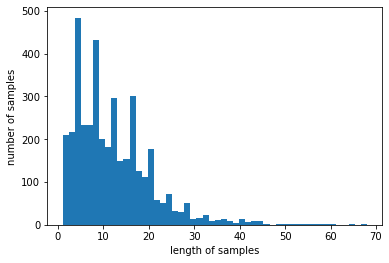

In [165]:
print('리뷰의 최대 길이:', max(len(l) for l in X_train))
print('리뷰의 평균 길이:', sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [166]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt+1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt/len(nested_list))*100))

In [167]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 96.28975265017668


In [168]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

# 6. LSTM으로 영화 관련 댓글 분류

In [169]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [170]:
model = Sequential()
model.add(Embedding(total_cnt, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [171]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True) 

In [172]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
53/53 [==============================] - ETA: 0s - loss: 0.5021 - acc: 0.7548
Epoch 00001: val_acc improved from -inf to 0.87390, saving model to best_model.h5
53/53 [==============================] - 4s 75ms/step - loss: 0.5021 - acc: 0.7548 - val_loss: -5.5271 - val_acc: 0.8739
Epoch 2/15
53/53 [==============================] - ETA: 0s - loss: 0.2224 - acc: 0.9233
Epoch 00002: val_acc did not improve from 0.87390
53/53 [==============================] - 3s 57ms/step - loss: 0.2224 - acc: 0.9233 - val_loss: -12.0144 - val_acc: 0.8676
Epoch 3/15
53/53 [==============================] - ETA: 0s - loss: 0.1485 - acc: 0.9454
Epoch 00003: val_acc did not improve from 0.87390
53/53 [==============================] - 3s 57ms/step - loss: 0.1485 - acc: 0.9454 - val_loss: -16.6500 - val_acc: 0.8676
Epoch 4/15
53/53 [==============================] - ETA: 0s - loss: 0.1040 - acc: 0.9650
Epoch 00004: val_acc did not improve from 0.87390
53/53 [==============================] - 3s 54m

In [173]:
loaded_model = load_model('best_model.h5')
print('\n 테스트 정확도: %.4f' % (loaded_model.evaluate(X_test, y_test)[1]))

19/19 [==============================] - 0s 9ms/step - loss: 0.3829 - acc: 0.8779

 테스트 정확도: 0.8779


In [183]:
def nlp_predict(new_sentence):
    new_sentence = okt.morphs(new_sentence, stem=True)
    new_sentence = [word for word in new_sentence if not word in stopwords]
    
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen = max_len)
    score = float(loaded_model.predict(pad_new))
    
    if(score > 0.5):
        print("{:.2f}% 확률로 영화 관련 리뷰입니다.\n".format(score *100))
    else:
        print("{:.2f}% 확률로 영화 관련 리뷰가 아닙니다.\n".format((1-score)*100))

# 7. 테스트

In [186]:
nlp_predict('메이플스토리 너무 재밌다')

99.74% 확률로 영화 관련 리뷰가 아닙니다.



In [187]:
nlp_predict('게임 너무 재밌다 ㅎㅎㅎ')

97.55% 확률로 영화 관련 리뷰가 아닙니다.



In [188]:
nlp_predict('안녕하세요?')

97.13% 확률로 영화 관련 리뷰가 아닙니다.



In [189]:
nlp_predict('재미없다')

99.21% 확률로 영화 관련 리뷰입니다.



In [190]:
nlp_predict('이게임노잼')

98.63% 확률로 영화 관련 리뷰가 아닙니다.



In [191]:
nlp_predict('김서영')

56.03% 확률로 영화 관련 리뷰가 아닙니다.

